# PROBLEM ONE  Select Features And Categories For Practice

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [75]:
from sklearn.datasets import load_iris
iris = load_iris()

In [76]:
# Store features matrix in 
data = pd.DataFrame(data= np.c_[iris['data']],
                  columns= iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [77]:
#Store target vector in
target =  pd.DataFrame(data= np.c_[iris['target']],
                  columns=['Species'])
target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [78]:
df = pd.concat([data, target], axis=1).loc[target['Species'].isin([1, 2])]
df = df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [79]:
df1 = df.loc[:,['sepal length (cm)', 'petal length (cm)', 'Species']]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


# PROBLEM TWO  Data Analysis 

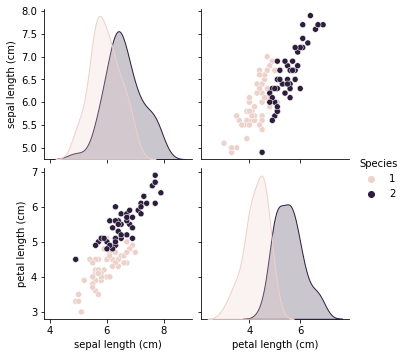

In [80]:
sns.pairplot(df1, hue='Species')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


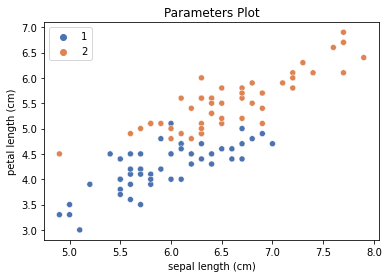

In [81]:
plt.title("Parameters Plot")
sns.scatterplot('sepal length (cm)', 'petal length (cm)', data=df1, hue='Species', palette="deep")
plt.legend(loc="upper left")
plt.show()

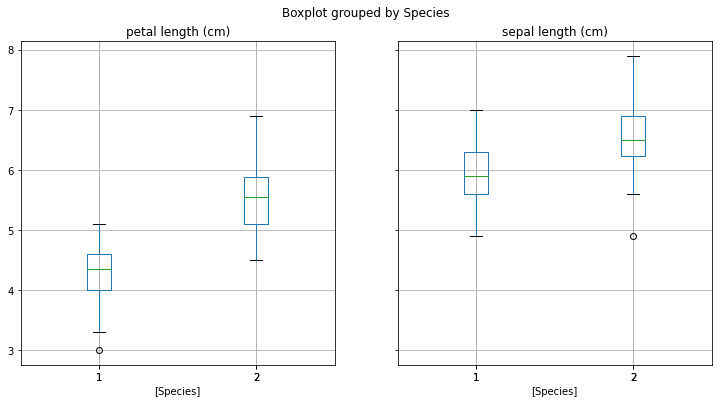

In [12]:
df1.boxplot(by='Species',figsize=(12,6))
plt.show()

<AxesSubplot:xlabel='Species', ylabel='petal length (cm)'>

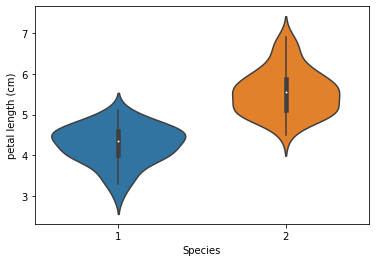

In [13]:
sns.violinplot(x='Species', y='petal length (cm)', data=df1, figsize=(12,6))

<AxesSubplot:xlabel='Species', ylabel='sepal length (cm)'>

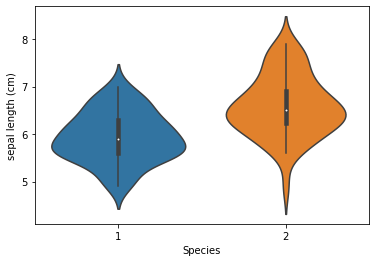

In [14]:
sns.violinplot(x='Species', y='sepal length (cm)', data=df1)

In [15]:
X = np.array(df1.loc[:,['sepal length (cm)', 'petal length (cm)']])
X.shape

(100, 2)

In [16]:
y = np.array(df1.loc[:,['Species']]).ravel()
y.ndim

1

# PROBLEM THREE  Division Of Preprocessing/Training Data And Verification Data

**Train Test Split**<br>
Split your data into a training set and a testing set.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
X_train.shape, X_test.shape

((75, 2), (25, 2))

# PROBLEM FOUR  Pretreatment/Standardization

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_trainTransform = scaler.transform(X_train)
X_testTransform = scaler.transform(X_test)

#  PROBLEM FIVE  Learning And Estimation

In [86]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 5)


# Instantiate learning model (k = 1)
knn_classifier1 = KNeighborsClassifier(n_neighbors=1)
knn_classifier1.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred1 = knn_classifier1.predict(X_testTransform)
print("pred1 = ", y_pred1)



# Predicting the Test set results
y_pred5 = knn_classifier5.predict(X_testTransform)
print("pred5 = ", y_pred5)



# Instantiate learning model (k = 3)
knn_classifier3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier3.fit(X_trainTransform, y_train)

# Predicting the Test set results
y_pred3 = knn_classifier3.predict(X_testTransform)
print("pred3 = ", y_pred3)

pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


# PROBLEM SIX  Evaluation

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

prediction = [y_pred5, y_pred1, y_pred3]
keys = ["knn5", "knn1", "knn3"]

for a, prediction in enumerate(prediction, 0):
    print("prediction of = ", keys[a])
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precission score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))
    print('....................................................') 

prediction of =  knn5
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]
....................................................
prediction of =  knn1
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
....................................................
prediction of =  knn3
Accuracy =  80.0
Recall =  [0.85714286 0.72727273]
F1 score =  [0.82758621 0.76190476]
Precission score =  [0.8 0.8]
Confusion =  [[12  2]
 [ 3  8]]
....................................................


**Recall** is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.<br>
**Accuracy** is the number of correctly predicted data points out of all the data points. Classification accuracy is our starting point. It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage<br>
**Precision** answers the question, out of the number of times a model predicted positive, how often was it correct? Precision should be used as a performance metric when the importance of False Positive is very high and the importance of false negative is very low<br>
**F1 score** is used as a performance metric when the number of samples in the positive class is very less and if the cost of false-positive and the cost of false negative both are very high.

# PROBLEM SEVEN  Visualization


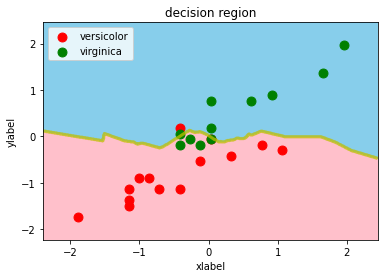

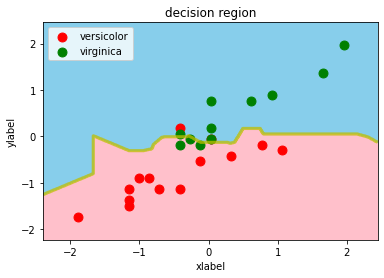

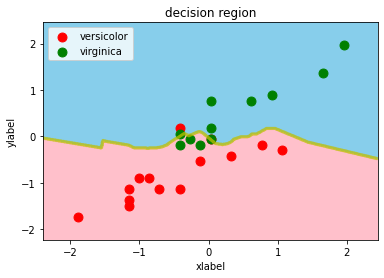

In [88]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [knn_classifier5, knn_classifier1, knn_classifier3]
for a, model in enumerate(models, 1):
    decision_region(X_testTransform, y_test, model)   
    

# PROBLEM EIGHT  Learning By Other Methods

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [90]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
kneig = KNeighborsClassifier()
kneig.fit(X_trainTransform, y_train)
y_predn = kneig.predict(X_testTransform)

In [93]:
# LOGISTIC REGRESSION
lrclassifier = LogisticRegression()
lrclassifier.fit(X_trainTransform, y_train);
y_pred_lrc = lrclassifier.predict(X_testTransform)


In [94]:
#Create a svm Classifier
clf = svm.SVC() 
clf.fit(X_trainTransform, y_train)
y_pred_svm = clf.predict(X_testTransform)


In [95]:
# DECISION TREE
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_clf.fit(X_trainTransform, y_train)
y_preddt = dt_clf.predict(X_testTransform)



In [96]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_trainTransform, y_train)
y_predrf = rf_clf.predict(X_testTransform)


estimating, evaluating and visualization 

KNN
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


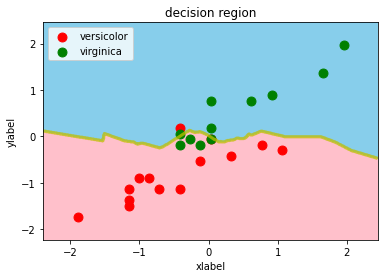



LOGISTIC REGRESSION
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


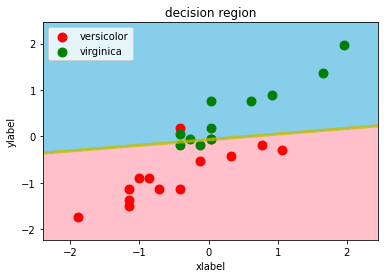



SVM
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  0.84
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


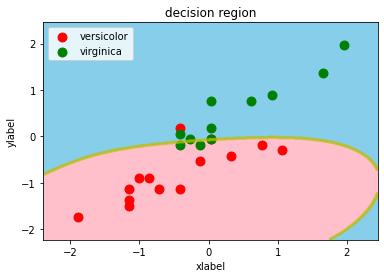



DECISION TREE
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


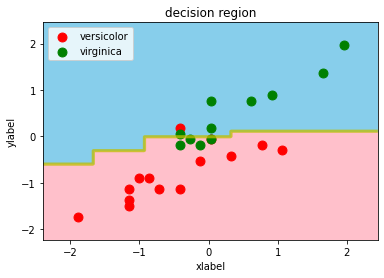



Random Forest
[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


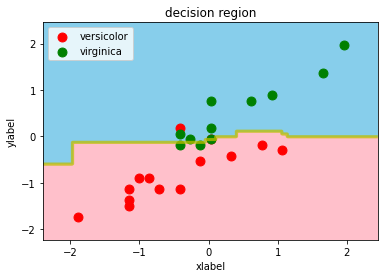

In [97]:
print("KNN")
print(y_predn)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predn)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predn, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predn, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predn))
decision_region(X_testTransform, y_test, kneig)
print('\n')

print("LOGISTIC REGRESSION")
print(y_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_lrc)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_lrc)) 
decision_region(X_testTransform, y_test, lrclassifier)
print('\n')

print("SVM")
print(y_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_pred_svm))
print("Recall = ", recall_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_pred_svm))    
decision_region(X_testTransform, y_test, clf)
print('\n')

print("DECISION TREE")
print(y_preddt)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_preddt)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_preddt, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_preddt))    
decision_region(X_testTransform, y_test, dt_clf)
print('\n')

print("Random Forest")
print(y_predrf)
print("Accuracy = ", accuracy_score(y_true=y_test, y_pred=y_predrf)*100)
print("Recall = ", recall_score(y_true=y_test, y_pred=y_predrf, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Precission score = ", precision_score(y_true=y_test, y_pred=y_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=y_predrf))
decision_region(X_testTransform, y_test, rf_clf)

# PROBLEM NINE (Advanced Task) Comparison With And Without Standardization

In [99]:
def comp_standard(title, prediction, model, std):
    print(title)
    print("Accuracy = ", accuracy_score(y_true=y_test, y_pred= prediction)*100)
    print("Recall = ", recall_score(y_true=y_test, y_pred=prediction, average=None))
    print("F1 score = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("Precission score = ", precision_score(y_true=y_test, y_pred=prediction, average=None))
    print("Confusion = ", confusion_matrix(y_true=y_test, y_pred=prediction))    
    decision_region(X_test, y_test, model)
model = [neig, lr_classifier, clf, dt_clf, rf_clf]

KNN
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


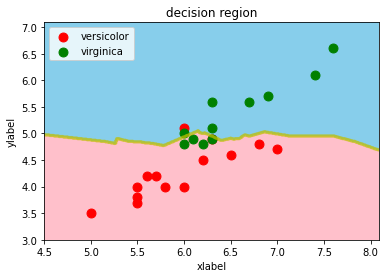

....................................................
LOGISTIC REGRESSION
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


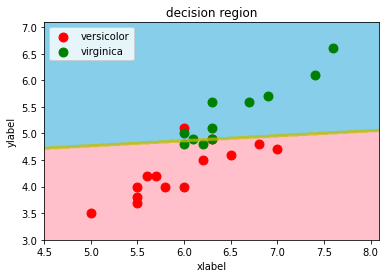

....................................................
SVM
Accuracy =  84.0
Recall =  [0.85714286 0.81818182]
F1 score =  [0.85714286 0.81818182]
Precission score =  [0.85714286 0.81818182]
Confusion =  [[12  2]
 [ 2  9]]


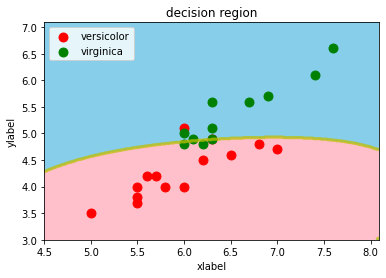

....................................................
DECISION TREE
Accuracy =  80.0
Recall =  [0.92857143 0.63636364]
F1 score =  [0.83870968 0.73684211]
Precission score =  [0.76470588 0.875     ]
Confusion =  [[13  1]
 [ 4  7]]


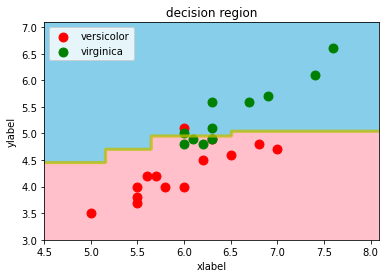

....................................................
Random Forest
Accuracy =  84.0
Recall =  [0.92857143 0.72727273]
F1 score =  [0.86666667 0.8       ]
Precission score =  [0.8125     0.88888889]
Confusion =  [[13  1]
 [ 3  8]]


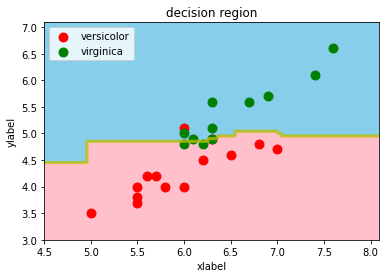

In [100]:
# KNN
neig = KNeighborsClassifier()
neig.fit(X_train, y_train)
y_predn = neig.predict(X_test)
comp_standard('KNN', y_predn, neig, std=False)
print('....................................................')
# LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train);
y_pred_lrc = lr_classifier.predict(X_test)
comp_standard('LOGISTIC REGRESSION', y_pred_lrc, lr_classifier, std=False)
print('....................................................')
#Create a svm Classifier
clf = svm.SVC() 
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
comp_standard("SVM", y_pred_svm, clf, std=False)
print('....................................................')
# DECISION TREE
dt_clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_clf.fit(X_train, y_train)
y_preddt = dt_clf.predict(X_test)
comp_standard('DECISION TREE', y_preddt, dt_clf, std=False)
print('....................................................')
#Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_predrf = rf_clf.predict(X_test)
comp_standard('Random Forest', y_predrf, rf_clf, std=False)

# PROBLEM TEN  (Advanced task) Method With High Accuracy Using All Objective Variables

In [101]:
# New training set
X1 = np.array(data.loc[:,['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [102]:
y1 = np.array(target).ravel()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [103]:
# TRAIN TEST SPLIT
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [104]:
# KNN
kneig = KNeighborsClassifier(n_neighbors=3)
kneig.fit(X1_train, y1_train)
y1_predn = kneig.predict(X1_test)

# LOGISTIC REGRESSION
lr_clf = LogisticRegression()
lr_clf.fit(X1_train, y1_train);
y1_pred_lrc = lr_clf.predict(X1_test)

#Create a svm Classifier
svm_clf = svm.SVC() 
svm_clf.fit(X1_train, y1_train)
y1_pred_svm = svm_clf.predict(X1_test)

# DECISION TREE
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X1_train, y1_train)
y1_preddt = dtree_clf.predict(X1_test)

#Random Forest
ranf_clf = RandomForestClassifier(random_state=0)
ranf_clf.fit(X1_train, y1_train)
y1_predrf = ranf_clf.predict(X1_test)

In [105]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region1(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'Setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'purple']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [kneig, lr_clf, svm_clf, dtree_clf, ranf_clf]
#for a,model in enumerate(models, 1):
    #ecision_region1(X1_test, y1_test, model)   
  

KNN
[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  94.73684210526315
Recall =  [1.         0.90909091 0.91666667]
F1 score =  [1.         0.90909091 0.91666667]
Precission score =  [1.         0.90909091 0.91666667]
Confusion =  [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


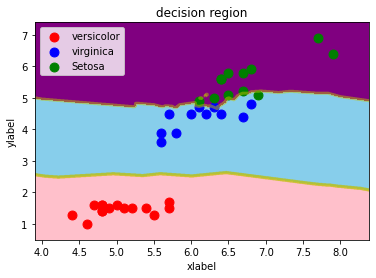

....................................................
LOGISTIC REGRESSION
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  100.0
Recall =  [1. 1. 1.]
F1 score =  [0.         0.61111111]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


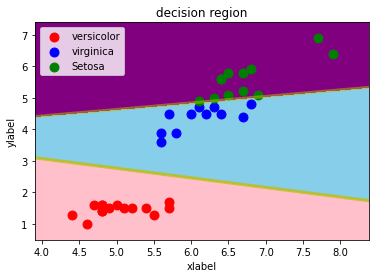

....................................................
SVM
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  1.0
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


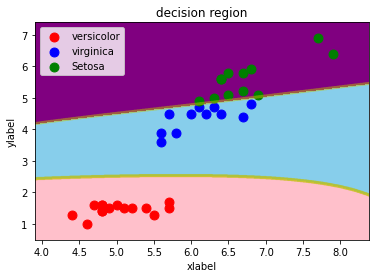

....................................................
DECISION TREE
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0]
Accuracy =  97.36842105263158
Recall =  [1.         1.         0.91666667]
F1 score =  [1.         0.95652174 0.95652174]
Precission score =  [1.         0.91666667 1.        ]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


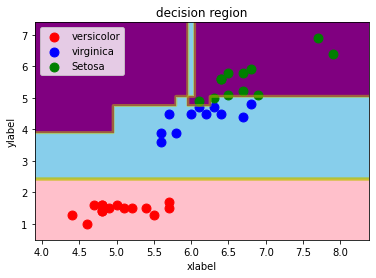

....................................................
Random Forest
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy =  100.0
Recall =  [1. 1. 1.]
F1 score =  [1. 1. 1.]
Precission score =  [1. 1. 1.]
Confusion =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


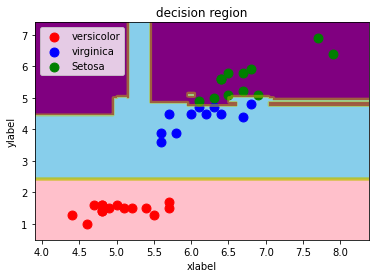

In [73]:
print("KNN")
print(y1_predn)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predn)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_predn, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_predn))
decision_region1(X1_test, y1_test, kneig)
print('....................................................') 

print("LOGISTIC REGRESSION")
print(y1_pred_lrc)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_lrc)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_lrc, average=None))
print("F1 score = ", f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_pred_lrc, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_lrc)) 
decision_region1(X1_test, y1_test, lr_clf)
print('....................................................') 

print("SVM")
print(y1_pred_svm)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_pred_svm))
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_pred_svm, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_pred_svm))    
decision_region1(X1_test, y1_test, svm_clf)
print('....................................................') 

print("DECISION TREE")
print(y1_preddt)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_preddt)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_preddt, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_preddt))    
decision_region1(X1_test, y1_test, dtree_clf)
print('....................................................') 

print("Random Forest")
print(y1_predrf)
print("Accuracy = ", accuracy_score(y_true=y1_test, y_pred=y1_predrf)*100)
print("Recall = ", recall_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("F1 score = ", f1_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("Precission score = ", precision_score(y_true=y1_test, y_pred=y1_predrf, average=None))
print("Confusion = ", confusion_matrix(y_true=y1_test, y_pred=y1_predrf))
decision_region1(X1_test, y1_test, ranf_clf)